### MA755 Machine Learning - Classification - 21 Mar 2017 

These notes are based on, and include images from, [_Hands-On Machine Learning with Scikit-Learn and TensorFlow_](http://shop.oreilly.com/product/0636920052289.do)
- by Aurélien Géron
- Published by O'Reilly Media, Inc., 2017

### Matrix multiplication

Linear algebra and, in particular, matrix multiplcation are essential to many machine learning techniques. 

To that end the following provides a couple examples of matrix multiplication:
- https://www.mathsisfun.com/algebra/matrix-multiplying.html

Matrix multiplication is also referred to as the _dot product_

### Install and load packages

In [ ]:
!conda install graphviz  -y
!conda install pydotplus -y
!conda install IPython   -y

### Load libraries

In [4]:
import numpy             as np
import pandas            as pd

%matplotlib inline
import matplotlib        as mpl
import matplotlib.pyplot as plt
import pydotplus         as pdp
import seaborn           as sea

import sklearn.metrics         as sk_me
import sklearn.model_selection as sk_ms
import sklearn.linear_model    as sk_lm
import sklearn.preprocessing   as sk_pp
import sklearn.multiclass      as sk_mc
import sklearn.datasets        as sk_ds
import sklearn.tree            as sk_dt
import sklearn.pipeline        as sk_pl
import sklearn.svm             as sk_sv
import sklearn.neighbors       as sk_nb

import scipy.stats             as sp_st
import IPython.display         as ip_d
import pickle                  as pickle

The following imports are not used. (So I should delete them, right?)

from sklearn.datasets.mldata import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model    import SGDClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.preprocessing   import LabelBinarizer
from sklearn.preprocessing   import StandardScaler
from sklearn.multiclass      import OneVsRestClassifier
from sklearn.multiclass      import OneVsOneClassifier
from scipy.stats             import describe
from sklearn.calibration     import CalibratedClassifierCV

### Regularization 

Models (of different types) can (in different ways) overfit the dataset. 

Regularization is a collection of techniques to mitigate the risk that models have of overfitting the dataset.

For any given model there are a collection of parameters that control regularization. I'll present them below.

[CrossValidated: Regularization in plain English](http://stats.stackexchange.com/questions/4961/what-is-regularization-in-plain-english)

### Models

- Logistic regression
- Decision tree
- Support vector machine

For several examples the iris dataset is used: 

In [5]:
iris = sk_ds.load_iris()
(iris.data.shape, 
 iris.target.shape
)

((150, 4), (150,))

Create train and test datasets. 

The 50/50 split is only for my example below. Use `test_size=0.2` for your split.

In [6]:
(iris_train_data,   iris_test_data,
 iris_train_target, iris_test_target
 ) = sk_ms.train_test_split(iris.data, 
                            iris.target, 
                            test_size=0.5, 
                            random_state=42)
(iris_train_data.shape, iris_train_target.shape, 
 iris_test_data.shape,  iris_test_target.shape
)

((75, 4), (75,), (75, 4), (75,))

### Logistic regression

A logistic regression model (of a dataset) is a vector $\theta$ of coefficients. 

Let 

- $m$ denotes the number of rows of the dataset
- $x$ denotes a vector of values for the independent variable (for a row)
- $y$ denotes a value for the binary dependent variable (for a row)
- $x^{(i)}$ denotes the vector of values for independent variables for row $i$
- $y^{(i)}$ denotes the values of the dependent variable value for row $i$

The dot product $\theta\cdot x$ is the sum of the pairwise products of elements of $x$ and of $\theta$. For instance: $$(1,2,3) \cdot (4,5,6) = 1*4 + 2*5 + 3*6 = 32
$$ 

The _logistic_ is a sigmoid ("S"-shaped) function:
$$\sigma(t) = \frac{1}{1 + e^{(-t)}}
$$

If $x = (x_0, x_1, x_2)$ and $\theta = (\theta_0, \theta_1, \theta_2)$ then 
the probability estimate $\hat{p}$ for $x$ is: 
\begin{align}
\hat{p} & = \sigma\left( \theta \cdot x \right)
\\      & = \sigma\left( \left(x_0, x_1, x_2\right) \cdot \left(\theta_0, \theta_1, \theta_2\right) \right)
\\      & = \sigma\left(x_0*\theta_0 + x_1*\theta_1 + x_2*\theta_2\right)
\end{align} 



The prediction for $x$ is:
\begin{align}
\hat{y} & = \operatorname{round}\left( \hat{p} \right) 
\\      & = \operatorname{round}\left(\sigma \left( \theta \cdot x \right) \right)
\end{align}

### Logistic regression - cost function

The cost of a prediction made for an $x$ is
$$c(\theta, x) = 
\begin{cases}
   - \log(\hat{p})     & \text{if } y = 1
\\ - \log(1 - \hat{p}) & \text{if } y = 0
\end{cases}$$

The cost function over the entire training set (all $m$ cases) is
$$J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ 
    y^{(i)} \log(\hat{p}^{(i)}) + (1-y^{(i)}) \log(1 - \hat{p}^{(i)}) 
\right]
$$
Values for $\theta$ are chosen so that this cost function is minimized. 

### Logistic regression - regularization

There are three types of regularization that can be used with Logistic regression: 

- __Lasso__/__L1__: to the cost function add $\alpha\sum_{i=1}^{n} |\theta_i|$ 
- __Ridge__/__L2__: to the cost function add $\alpha\sum_{i=1}^{n} (\theta_i)^2$ 
- __Elasticnet__: to the cost function add $r\alpha\sum_{i=1}^{n} |\theta_i| + \frac{1-r}{2}\alpha\sum_{i=1}^{n} (\theta_i)^2$ 

Notes about choosing one or the other:

- if you suspect that only few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero as we discussed above. 
- In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

The `sklearn` library has two implementations of logistic regression: `SGDClassifier` and `LogisticRegression`. 
Their regularization parameters are described below.

[`SGDClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

- `alpha` (`float`, $\alpha$ in the formulas above):
A constant that multiplies the regularization term. Defaults to `0.0001`. 
- `l1_ratio` (`float`, $r$ in the formuas above): 
The Elastic Net mixing parameter, with `0 <= l1_ratio <= 1`. When `l1_ratio=0` this corresponds to the __L2__ penalty. When `l1_ratio=1` this corresponds to __L1__. Defaults to `0.15`.

[`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

- `penalty`: A string/`str` equal to either `'l1'` or `'l2'`. Defaults to `'l2'`.
Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only __L2__ penalties.

See also:

- [CrossValidated: Regularization methods for logistic regression](http://stats.stackexchange.com/questions/228763/regularization-methods-for-logistic-regression)
- [Quora: Difference between L1 and L2 regularization](https://www.quora.com/What-is-the-difference-between-L1-and-L2-regularization) 


### Logistic regression - example

In [5]:
log_reg = sk_lm.LogisticRegression()
log_reg.fit(iris_train_data, 
            iris_train_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Decision tree 

- The `sklearn` library uses the CART (Classification and Regression Trees) algorithm
- See [sklearn.tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- See http://scikit-learn.org/stable/modules/tree.html
- See [Scikit-learn Decision Tree Learning I](http://www.bogotobogo.com/python/scikit-learn/scikt_machine_learning_Decision_Tree_Learning_Informatioin_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php)
- See [Scikit-learn Decision Tree Learning II](http://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Constructing_Decision_Tree_Learning_Information_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php)

In the next section "__Decision tree - example using the iris dataset__" code is presented which:

1. creates a decision tree classifier
1. fits the classifier to the train dataset
1. displays the decision tree model

The following section "__Decision tree - model and algorithm details__" then provides details of the model. 

The section following that "__Decision tree - regularization__" describes the effects of hyperparameters on the model. 

### Decision tree - example using the iris dataset

Create a decision tree classifier:

In [6]:
dt_clf  = sk_dt.DecisionTreeClassifier()
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Fit the classifier to the training data:

In [7]:
dt_clf.fit(iris_train_data, 
           iris_train_target)
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Create an image of the fit classifier:

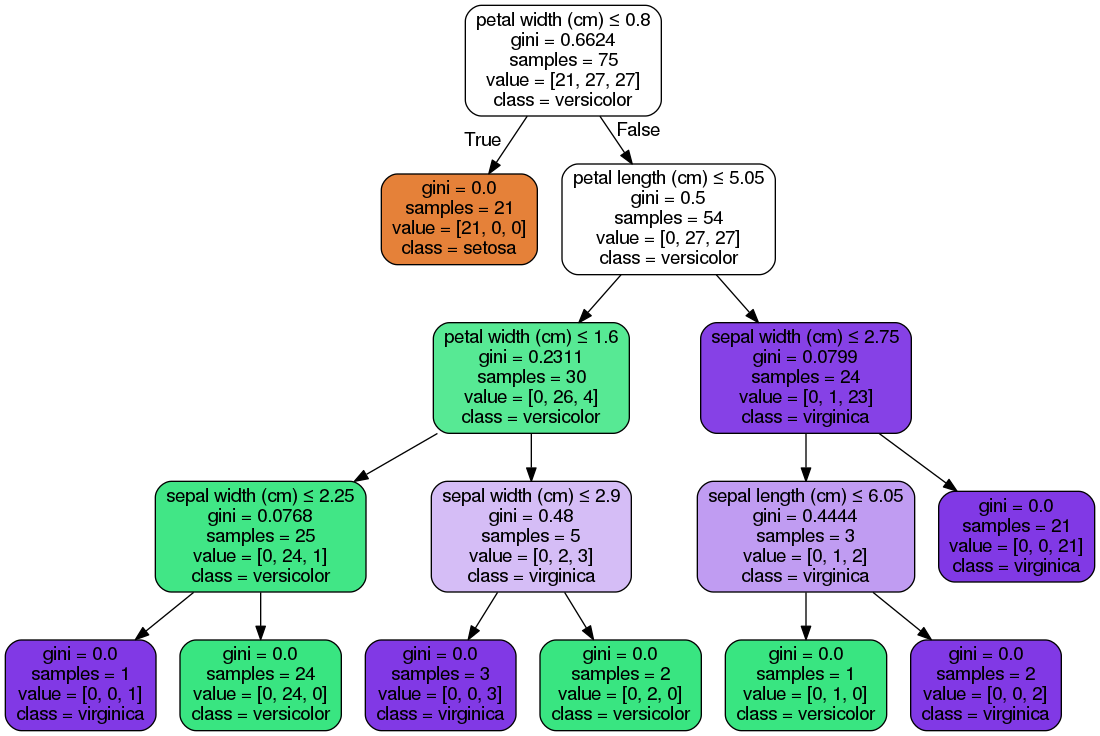

In [8]:
graph = sk_dt.export_graphviz(dt_clf, 
                              out_file=None, 
                              feature_names=iris.feature_names,  
                              class_names=iris.target_names,  
                              filled=True, 
                              rounded=True,  
                              special_characters=True)
                               
ip_d.Image(pdp.graph_from_dot_data(graph
                                  ).create_png()
          ) 

Refer to this image as we discuss the model and algorithm below.

### Decision tree - background

Decision tree classifiers require a categorical target variable, which we assume is binary in the descriptions below, but this is not a requirement.

The decision tree model relies on measurements of the __impurity__ of a (subset of a) dataset.
A subset is:

- __most pure__ if all records in the subset contain the same value for the target variable
- __least pure__ if there are an equal number of rows with either value of the target variable

Three measures of impurity are described below: Gini index, entropy and classification error.

The __Gini index__ of node $i$ is:
$$ G_{i} = 1 - \sum^{n}_{k=1} (p_{i,k})^{2}
$$
where 

- $n$ is the number of classes
- $p_{i,k}$ is the proportion of rows in node $i$ of class $k$

The result of $G_{i}$ is:

- $0$ if the node contains only a single class - most pure
- $1/2$ if the node contains an equal number of rows in each of two classes - least pure
- $2/3$ if the node contains an equal number of rows in each of three classes - least pure


Use `DecisionTreeClassifier(criterion = "gini")`

The __entropy__ of node $i$ is:
$$ H_{i} = - \sum^{n}_{k=1} p_{i,k} \log_2(p_{i,k})
$$
where 

- the $\log$ function is base 2
- $n$ is the number of classes
- $p_{i,k}$ is the proportion of rows in node $i$ of class $k$
- the summation does not contain terms where $p_{i,k}$ is zero

The result of $H_i$ is:

- `0` if the node contains only rows of a single class - most pure
- `1` if the node contains an equal number of rows in each of two classes - least pure

Use `DecisionTreeClassifier(criterion = "entropy")`

The __classification error__ of node $i$ is:
$$ C_i = 1 - \max_{k=1}^{n}(p_{i,k})
$$
where 

- $n$ is the number of classes
- $p_{i,k}$ is the proportion of rows in node $i$ of class $k$

The result of $C_i$ is:

- `0` if the node contains only rows of a single class - most pure
- `1/2` if the node contains an equal number of rows in each class - least pure

Classification error is not available from `DecisionTreeClassifier`.

A __split__ of a dataset is (typically) a numeric variable $k$ and a threshold $t_k$ for that variable. 
The split divides the dataset into two samples:

1. The first/left dataset consists of all rows where $k < t_k$
1. The second/right dataset consists of all rows where $k \ge t_k$

The impurity (of the two datasets) of a split $(k, t_k)$ is:
$$ I(k, t_k) = \frac{m_{left}}{m} I_{left} + \frac{m_{right}}{m} I_{right}
$$
where: 

- $I$ is one of the three impurity measures
- $m$ is the number of rows in the dataset
- $m_{left}$ and $m_{right}$ are the number of rows in the left and right datasets
- $I_{left}$ and $I_{right}$ are the impurity measures of the left and right datasets

The impurity of a split is the weighted average of the impurities $I_{left}$ and $I_{right}$ of the two datasets.

Recall that these impurity measures are:

- highest when the dataset contains the same number of cases for each value of the target variable - least pure
- lowest when the dataset contains only a single value of the target variable - most pure

The goal of a split is to minimize the impurity (which means maximize the purity) of the split. 

### Decision tree - algorithm

1. Let $S$ contain the entire dataset and create a node for $S$ (this is the root node)
1. Find the impurity $I(S)$ of $S$ and if $I(S) = 0$ then stop 
1. Find the impurity $I(k,t_k)$ of the best split $(k,t_k)$
1. Let $S_{left}$ contain all rows from $S$ where $k < t_k$ 
    - create a node for $S_{left}$
    - draw a line from $S$ to $S_{left}$ and label it $k < t_k$ 
    - Set $S=S_{left}$ and go to step 2 
1. Let $S_{right}$ contain all rows from $S$ where $k \ge t_k$ 
    - create a node for $S_{right}$
    - draw a line from $S$ to $S_{right}$ and label it $k \ge t_k$ 
    - Set $S=S_{right}$ and go to step 2 

__Predictions are based on the largest class at a _leaf_ node for records that satisfy the split inequalities that lead to that node.__ 

### Decision tree - regularization

The leaf nodes created by the above algorithm are always pure, but in most cases this results in overfitting the model to the training dataset.

__Regularization__ is the process of introducing constraints that prevent the model from overfitting the training dataset. 

See <https://en.wikipedia.org/wiki/Regularization_(mathematics)>.

The following hyperparameters provide regularization contraints: 

- `max_features`: the maximum number of features to consider for each split
- `max_depth`: the maximum depth of the tree
- `min_samples_split`: the minimum number of samples that must be present in a node to split the node
- `min_samples_leaf`: the minimum number of samples that must be present in each leaf to split a node
- `min_impurity_split`: the minimum reduction in impurity, between a (parent) node and the weighted average of its left and right (child) nodes, required to create the child nodes

Notice that even though the model fits the training set perfectly there it still produces errors (incorrect predictions) on the testing dataset. 

Create predictions for the training and the testing datasets (based on the model fitted to the training dataset.)

In [9]:
dt_clf  = sk_dt.DecisionTreeClassifier()
dt_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [10]:
iris_train_predict = dt_clf.fit(iris_train_data,
                                iris_train_target
                               ).predict(iris_train_data
                                        )
iris_test_predict = dt_clf.fit(iris_train_data, 
                               iris_train_target
                              ).predict(iris_test_data
                                       )

A confusion matrix is produced for each. This is a simple example of overfitting the dataset.

In [11]:
pd.DataFrame(sk_me.confusion_matrix(iris_train_target, 
                                    iris_train_predict
                                   )
            )

,0,1,2
0,21,0,0
1,0,27,0
2,0,0,27


Notice the errors on the test dataset. 

In [12]:
pd.DataFrame(sk_me.confusion_matrix(iris_test_target, 
                                    iris_test_predict
                                   )
            )

,0,1,2
0,29,0,0
1,0,20,3
2,0,4,19


Now create a decision tree model with leaf nodes that contain at least 5 rows. This is a simple example of regularization (working.)

In [13]:
dt_clf  = sk_dt.DecisionTreeClassifier(min_samples_leaf=5)

Create the predictions:

In [14]:
iris_train_predict = dt_clf.fit(iris_train_data,
                                iris_train_target
                               ).predict(iris_train_data
                                        )
iris_test_predict = dt_clf.fit(iris_train_data, 
                               iris_train_target
                              ).predict(iris_test_data
                                       )

Produce a confusing matrix for predictions on the training dataset:

In [15]:
pd.DataFrame(sk_me.confusion_matrix(iris_train_target, 
                                    iris_train_predict
                                   )
            )

,0,1,2
0,21,0,0
1,0,24,3
2,0,1,26


Produce a confusing matrix for predictions on the test dataset. Notice the lack of errors. 

In [16]:
pd.DataFrame(sk_me.confusion_matrix(iris_test_target, 
                                    iris_test_predict
                                   )
            )

,0,1,2
0,29,0,0
1,0,23,0
2,0,0,23


### Support vector machine - linear

In a very informal sense, the support vector machine model is used to separate two sets of datapoints.

In the most basic case the separator is a line in the plane. 
Here we use the iris dataset with two variables (petal length and petal width.)

![text](mlst_0501.png)

With three variables the separator would be a plane. 
With more than three variables the separator is called a _hyperplane_.

Notice on the left example that many lines can be drawn that separate these two sets of datapoints. 

The best separator is determined by creating the widest possible street, which is refered to as the __margin__, that separates the two sets of datapoints.
This is called __large margin classification__. 

Notice that both edges of the street will always touch at least one data point (each.)

But this isn't realistic. Most pairs of dataset are not so easily separated, especially with a line/plane/hyperplane. 
See the example on the left. 

![alt text](mlst_0503.png "title")

In addition, these separators (and the SVM model) are sensitive to outliers, as you can see on the right.

One remedy for both of these problems is to create a margin, that is still as wide as possible, but that allows exceptions, which are points either in, or on the wrong side of, the street/margin. These points are called __margin violations__ in the text. This is called __soft margin classification__ and is used in practice.

There are two goals of SVM using soft margin classification: 

1. To create a wide margin/street
1. To minimize the number of violations

The `LinearSVC` and `SVC` implementations have a parameter `C` to balance the margin width and the number of violations:

- a smaller `C` makes a wider margin, but more margin violations
- a high `C` makes fewer margin violations, but a smaller margin

From the text: 
- Alternatively, you could use the SVC class, using SVC(kernel="linear", C=1), but it is much slower, especially with large training sets, so it is not recommended. 
- Another option is to use the SGDClassifier class, with SGDClassifier(loss="hinge", alpha=1/(m*C)): this applies regular Stochastic Gradient Descent (see Chapter 4) to train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but it can be useful to handle huge datasets that do not fit in memory (out-of-core training), or to handle online classification tasks.

The `SGDClassifier` is useful for large datasets o

### Support vector machine - non-linear

Notice that the left example, with a single variable $x_1$, is not separable. 

But in the right example, the new dataset is separable, with only one additional variable $x_2 = (x_1)^2$.

![](mlst_0505.png)

The following code uses the `PolynomialFeatures` class to create new variables for, in this case, the 0th, 1st and 2nd order terms:

First create three a dataset with three rows and two columns:

In [17]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

Now add 0th and 2nd degree polynomial features to the dataset:

In [18]:
poly = sk_pp.PolynomialFeatures(2)
poly.fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.],
       [  1.,   4.,   5.,  16.,  20.,  25.]])

Using this technique doesn't scale well so it's useful only as a motivating example. 

The following code creates a dataset with a categorical target variable `z`, where the two classes are not easily separable, which we will separate using the non-linear SVM method.

In [8]:
moons_ind, moons_tgt = sk_ds.make_moons()
moons_df = pd.DataFrame(np.concatenate((moons_ind, 
                                        moons_tgt.reshape((100,1))), 
                                       axis=1))
moons_df.columns = ['x','y','z']
moons_df[0:3]

,x,y,z
0,0.537462,-0.386599,1.0
1,0.099031,0.066116,1.0
2,-0.718349,0.695683,0.0


Now plot the two classes. It's clear that they are not linearly separable.

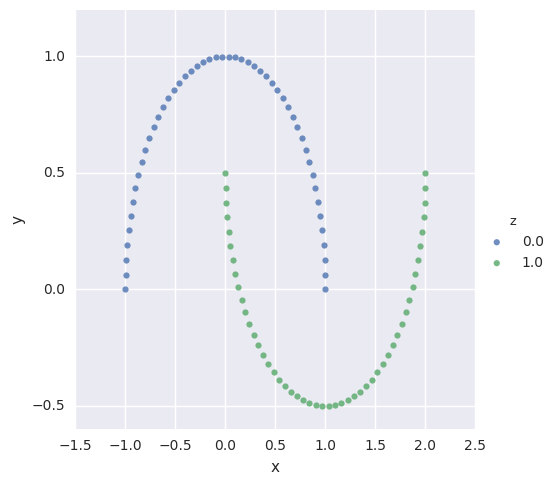

In [9]:
sea.lmplot('x', 'y', data=moons_df, hue='z', fit_reg=False)

In a pipeline you _could_ create the new 2nd order features, normalize all the features and then fit a linear SVM model to the new dataset. 

The following code:
1. transforms the data by creating the polynomial terms
1. normalizes the features 
1. finds a linear SVM model that separates the two classes. 

In [12]:
polynomial_svm_clf = sk_pl.Pipeline((
        ("poly_features", sk_pp.PolynomialFeatures(degree=3)),
        ("scaler"       , sk_pp.StandardScaler()),
        ("svm_clf"      , sk_sv.LinearSVC(C=10, loss="hinge"))
    ))

polynomial_svm_clf.fit(moons_ind,
                       moons_tgt)

Pipeline(steps=(('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))))

The __kernel trick__ does this type of thing (but better) and is implemented in the `SVC` class. 

Try this code with `degree=1`, `degree=2` and `degree=3` and check the resulting confusion matrix. 

In [13]:
poly_kernel_svm_clf = sk_pl.Pipeline((
        ("scaler" , sk_pp.StandardScaler()),
        ("svm_clf", sk_sv.SVC(kernel="poly", degree=3, coef0=1, C=5))
    ))
poly_kernel_svm_clf.fit(moons_ind, moons_tgt)
moons_pre = poly_kernel_svm_clf.predict(moons_ind)
sk_me.confusion_matrix(moons_pre, 
                       moons_tgt)

array([[50,  0],
       [ 0, 50]])

For documentation on SVM classifiers in the `sklearn` library, see: 

- http://scikit-learn.org/stable/modules/svm.html
- http://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html
- http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
- http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
- http://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html

### Support vector machine - see also

- Similarity features (general method method, see text)
- Gaussian RBF kernel 

#### Support vector machine - computational complexity

- `LinearSVC` uses `liblinear` library: $O(m \times n / \log(\epsilon))$
- `SVC` class is based on the `libsvm` library: $O(m^2 \times n/\epsilon^2)$ to $O(m^3 \times n/\epsilon^2)$

### Multi-class/label/output classification

### Read the MNIST dataset

We use the MNIST dataset for examples.

In [14]:
mnist = pickle.load(open( "mnist.p", "rb" ))

In [15]:
lb = sk_pp.LabelBinarizer()
lb.fit(range(10))

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

Split MNIST data set into train and test data sets.

In [16]:
(train_data,        test_data, 
 train_target,      test_target,
 train_target_eq8,  test_target_eq8,
 train_target_1hot, test_target_1hot, 
) = sk_ms.train_test_split(mnist.data,
                           mnist.target.astype(int),
                           (mnist.target.astype(int)==8).astype(int),
                           lb.transform(mnist.target),
                           test_size=0.2, 
                           random_state=42)

(train_data.shape,        test_data.shape, 
 train_target.shape,      test_target.shape,
 train_target_eq8.shape,  test_target_eq8.shape,
 train_target_1hot.shape, test_target_1hot.shape,
)

((56000, 784),
 (14000, 784),
 (56000,),
 (14000,),
 (56000,),
 (14000,),
 (56000, 10),
 (14000, 10))

In [27]:
train_target[0:3]

array([7, 7, 1])

In [28]:
train_target_1hot[0:3]

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

### Multi-class and multi-label classification

Multiclass and multilabel algorithms: http://scikit-learn.org/stable/modules/multiclass.html

In [17]:
sgd_clf = sk_lm.SGDClassifier(loss='log', alpha=0.1, 
                              random_state=42)

All of the `sklearn` classifiers are multi-class. In fact they all default to one-vs-rest classification except for SVM which uses one-vs-one. You can change this using either:
- `OneVsRestClassifier` can be used with any binary classifier and can fit one hot targets
- `OneVsOneClassifier` can be used with any binary classifier, but cannot fit one hot targets

In [30]:
ovr_clf = sk_mc.OneVsRestClassifier(sk_lm.SGDClassifier()
                             )
train_fit = ovr_clf.fit(train_data,
                        train_target_1hot
                       )
test_predict_1hot = train_fit.predict(test_data)

In [31]:
test_predict_1hot[:3]

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [32]:
test_predict = sk_mc.OneVsOneClassifier(sgd_clf).fit(train_data, train_target).predict(test_data)

### Multi-label classification

The `KNeighborsClassifier` class can predict multi-label categorical targets.

See http://scikit-learn.org/stable/auto_examples/plot_multilabel.html

First create two target variables:
- The first is `True` when the digit is greater than or equal to `7`
- The second is `True` when the target is odd

Create a single multilabel target array:

In [19]:
y_multilabel = np.c_[train_target >= 7, 
                     train_target % 2 == 1
                    ]

In [21]:
train_target[0:3]

array([7, 7, 1])

In [20]:
y_multilabel[0:3]

array([[ True,  True],
       [ True,  True],
       [False,  True]], dtype=bool)

Create a K-nearest neighbors classifier and fit it to the training data:

In [26]:
knn_clf = sk_nb.KNeighborsClassifier()

knn_clf.fit(train_data, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Store three random row numbers in `test_ndx`. 

Then display the actual and predicted target values:

In [25]:
test_ndx = np.random.randint(0, train_data.shape[1], size=3)
print("Actual: ", train_target[test_ndx])
print("Predicted [ >=7, odd]: ")
knn_clf.predict(train_data[test_ndx])

Actual:  [6 9 0]
Predicted [ >=7, odd]: 


NameError: name 'knn_clf' is not defined

The `MultiLabelBinarizer` is good to now about, but is not part of an example.

In [36]:
y = [[2, 3, 4], [2], [0, 1, 3], [0, 1, 2, 3, 4], [0, 1, 2]]
sk_pp.MultiLabelBinarizer().fit_transform(y)

array([[0, 0, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 0]])

### Scoring and metrics

Scoring parameter: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

sklearn.metrics: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

[3.3. Model evaluation: quantifying the quality of predictions](http://scikit-learn.org/stable/modules/model_evaluation.html)

- `classification_report` returns precision, recall and F1-score.


In [38]:
sk_me.accuracy_score(test_target, 
                     test_predict
                    )

0.91871428571428571

In [40]:
sk_me.f1_score(test_target, test_predict)

ValueError: Target is multiclass but average='binary'. Please choose another average setting.

'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.

'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

'weighted': Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.


In [43]:
sk_me.f1_score(test_target, test_predict, average='micro')

0.91871428571428571

In [44]:
sk_me.f1_score(test_target, test_predict, average='macro')

0.91712521364972566

In [45]:
sk_me.f1_score(test_target, test_predict, average='weighted')

0.9184316386382122

In [46]:
print(sk_me.classification_report(test_target, test_predict))

             precision    recall  f1-score   support

          0       0.97      0.94      0.95      1349
          1       0.97      0.98      0.97      1581
          2       0.93      0.91      0.92      1400
          3       0.89      0.90      0.90      1434
          4       0.89      0.97      0.93      1328
          5       0.91      0.80      0.85      1286
          6       0.92      0.96      0.94      1407
          7       0.94      0.95      0.95      1476
          8       0.85      0.90      0.87      1391
          9       0.92      0.87      0.89      1348

avg / total       0.92      0.92      0.92     14000



`average_precision_score` may require 1hot encoding

In [47]:
sk_me.average_precision_score(test_target, test_predict)

ValueError: multiclass format is not supported

In [48]:
sk_me.precision_score(test_target, test_predict, average='micro')

0.91871428571428571

### The end.